# EDA: Portuguese student performance dataset

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [12]:
data_raw = pd.read_csv('../data/portuguese_students_data.csv')

In [13]:
data = data_raw.copy()
print(data.shape)
data.head()

(1044, 35)


,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,100097,Por,GP,F,16,U,GT3,A,3,4,services,other,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3,2,1,1,4,5,12,15,13,14
1,101021,Por,GP,F,17,U,GT3,T,3,2,other,other,course,mother,1,2,0,no,no,no,yes,no,yes,yes,no,5,3,4,1,3,3,2,17,18,17
2,102965,Por,GP,M,16,U,LE3,T,1,2,health,services,course,mother,2,1,2,no,no,no,no,no,yes,yes,no,4,4,5,3,5,5,0,9,8,10
3,102989,Por,MS,M,17,U,GT3,T,2,3,other,services,home,father,2,2,0,no,no,no,yes,yes,yes,yes,no,4,4,3,1,1,3,4,14,15,16
4,103131,Por,GP,F,16,U,GT3,T,1,1,at_home,other,home,mother,2,1,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,4,5,2,12,13,13


In [14]:
data.dtypes

ID             int64
Subject       object
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [15]:
data.columns

Index(['ID', 'Subject', 'school', 'sex', 'age', 'address', 'famsize',
       'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

### Normalize column names

In [16]:
data.columns = data.columns.str.lower()
data.columns = data.columns.str.replace(' ', '_', regex=True)

In [17]:
data.columns

Index(['id', 'subject', 'school', 'sex', 'age', 'address', 'famsize',
       'pstatus', 'medu', 'fedu', 'mjob', 'fjob', 'reason', 'guardian',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'dalc', 'walc', 'health', 'absences', 'g1', 'g2',
       'g3'],
      dtype='object')

### Check for missing values

In [18]:
data.isnull().sum()

id            0
subject       0
school        0
sex           0
age           0
address       0
famsize       0
pstatus       0
medu          0
fedu          0
mjob          0
fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
dalc          0
walc          0
health        0
absences      0
g1            0
g2            0
g3            0
dtype: int64

### Check for duplicate values

In [19]:
print(data['id'].nunique())
print(data['id'].value_counts().head())
# There is one duplicate id 980773
data[data['id'] == 980773]

1043
980773    2
669700    1
964177    1
501038    1
735578    1
Name: id, dtype: int64


,id,subject,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
1013,980773,Por,GP,M,16,U,LE3,T,2,2,other,other,reputation,mother,2,2,0,no,yes,no,yes,yes,yes,yes,no,5,4,4,2,4,5,2,10,10,10
1014,980773,Por,GP,F,17,R,GT3,T,2,2,other,other,reputation,mother,1,1,0,no,yes,no,no,yes,yes,yes,no,5,3,2,1,2,3,21,13,13,13


In [20]:
# The duplicates appear to be different students so we will change the ID of the second one
data.loc[data.index == 1014, 'id'] = 999999
data['id'].nunique()

1044

### Inspect distributions of features

In [21]:
# Number of students studying Portuguese and Math
print(data.subject.value_counts(), '\n')
# Number of students attending the two study schools
print(data.school.value_counts(), '\n')
# Number of male and female students
print(data.sex.value_counts(), '\n')
# Number of students living in rural or urban settings
print(data.address.value_counts(), '\n')
# Number of students with family size greater than or less than 3
print(data.famsize.value_counts(), '\n')
# Number of students wtih parents to or apart
print(data.pstatus.value_counts())

Por     649
Math    395
Name: subject, dtype: int64 

GP    772
MS    272
Name: school, dtype: int64 

F    591
M    453
Name: sex, dtype: int64 

U    759
R    285
Name: address, dtype: int64 

GT3    738
LE3    306
Name: famsize, dtype: int64 

T    923
A    121
Name: pstatus, dtype: int64


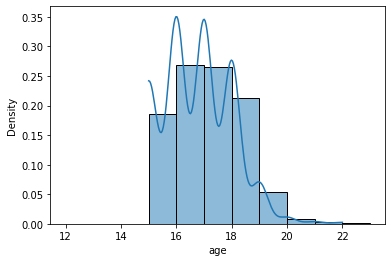

In [22]:
# Number of male and female students
sns.histplot(data=data.age, bins=np.arange(12, 24), stat='density', kde=True);

In [23]:
# There are some unusually old students
# They appear to be poor-performing, so perhaps they were held back?
data[data.age > 19]

,id,subject,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
95,173638,Por,GP,M,21,R,LE3,T,1,1,at_home,other,course,other,2,2,2,no,yes,no,yes,yes,no,yes,yes,5,3,3,5,2,4,21,9,10,10
284,342577,Math,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
340,390717,Por,GP,M,20,U,GT3,A,3,2,services,other,course,other,1,1,2,no,no,no,yes,yes,yes,no,no,5,5,3,1,1,5,0,14,15,15
369,417336,Math,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
570,586846,Math,GP,M,22,U,GT3,T,3,1,services,services,other,mother,1,1,3,no,no,no,no,no,no,yes,yes,5,4,5,5,5,1,16,6,8,8
653,658066,Por,MS,F,20,U,GT3,T,3,3,at_home,services,other,mother,2,2,1,no,no,no,yes,yes,yes,yes,yes,3,3,4,2,4,3,8,11,9,10
680,676866,Por,GP,M,22,U,GT3,T,3,1,services,services,other,mother,1,1,3,no,no,no,no,no,no,yes,yes,5,4,5,5,5,1,12,7,8,5
742,736856,Por,MS,M,20,R,GT3,T,1,1,other,other,course,other,2,1,1,no,yes,no,no,yes,no,yes,yes,4,4,3,2,4,4,12,8,11,10
759,746457,Math,GP,M,20,U,GT3,A,3,2,services,other,course,other,1,1,0,no,no,no,yes,yes,yes,no,no,5,5,3,1,1,5,0,17,18,18
810,800561,Por,GP,F,20,U,GT3,T,1,0,other,other,reputation,mother,2,1,1,yes,no,no,no,yes,yes,yes,yes,5,3,1,1,1,5,5,8,10,10


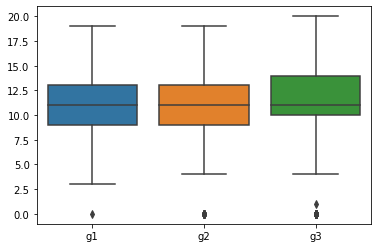

In [24]:
# Inspect information about the students academic performacne
# Check the ranges of the values
sns.boxplot(data=data[['g1','g2','g3']]);

In [25]:
data.failures.value_counts()

0    861
1    120
2     33
3     30
Name: failures, dtype: int64

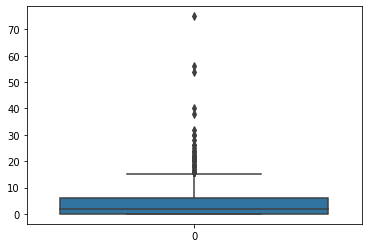

In [26]:
sns.boxplot(data=data.absences);

In [27]:
# Inspect the outlier values of absences
data[data.absences > 40]

,id,subject,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
234,292475,Math,GP,F,16,U,GT3,T,3,3,other,services,home,mother,1,2,0,yes,yes,yes,yes,yes,yes,yes,no,4,3,3,2,4,5,54,11,12,11
353,396440,Math,GP,F,17,U,LE3,T,3,3,other,other,reputation,mother,1,2,0,no,yes,no,yes,yes,yes,yes,yes,5,3,3,2,3,1,56,9,9,8
990,962706,Math,GP,F,18,R,GT3,A,3,2,other,services,home,mother,2,2,0,no,no,no,no,no,no,yes,yes,4,1,1,1,1,5,75,10,9,9


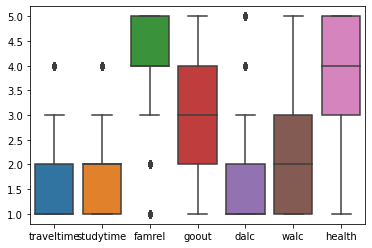

In [28]:
sns.boxplot(data=data[['traveltime','studytime','famrel','goout','dalc','walc','health']]);

In [29]:
print(data.activities.value_counts(), '\n')
print(data.nursery.value_counts(), '\n')
print(data.higher.value_counts(), '\n')
print(data.internet.value_counts(), '\n')
print(data.romantic.value_counts())

no     528
yes    516
Name: activities, dtype: int64 

yes    835
no     209
Name: nursery, dtype: int64 

yes    955
no      89
Name: higher, dtype: int64 

yes    827
no     217
Name: internet, dtype: int64 

no     673
yes    371
Name: romantic, dtype: int64


In [30]:
# Check parents
print(data.famsize.value_counts(), '\n')
print(data.pstatus.value_counts(), '\n')
print(data.guardian.value_counts())

GT3    738
LE3    306
Name: famsize, dtype: int64 

T    923
A    121
Name: pstatus, dtype: int64 

mother    728
father    243
other      73
Name: guardian, dtype: int64


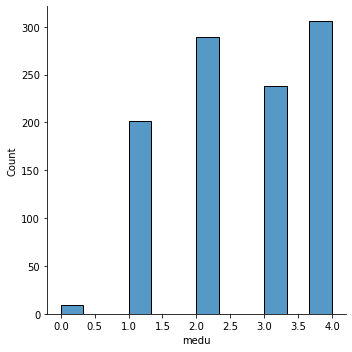

In [31]:
sns.displot(data.medu);

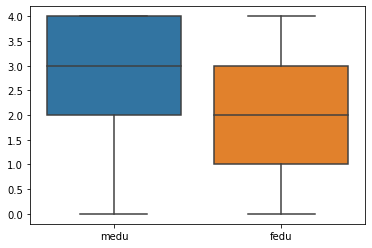

In [32]:
sns.boxplot(data=data[['medu','fedu']]);

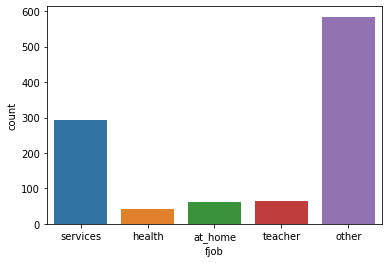

In [33]:
sns.countplot(x='fjob',data=data,order=['services','health','at_home','teacher','other']);

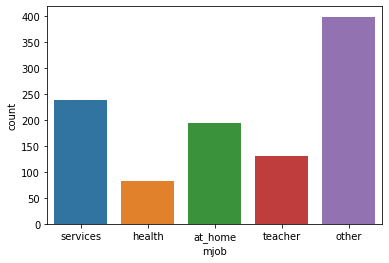

In [34]:
sns.countplot(x='mjob',data=data,order=['services','health','at_home','teacher','other']);

In [35]:
# Economic support
print(data.schoolsup.value_counts(), '\n')
print(data.famsup.value_counts(), '\n')
print(data.paid.value_counts())

no     925
yes    119
Name: schoolsup, dtype: int64 

yes    640
no     404
Name: famsup, dtype: int64 

no     824
yes    220
Name: paid, dtype: int64


## Sanity checks

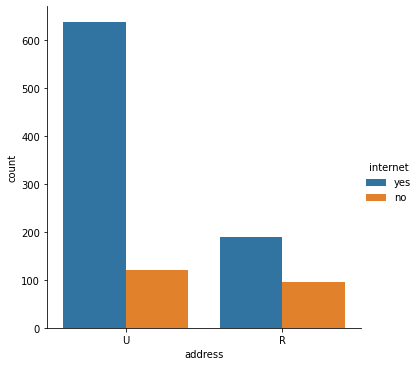

In [36]:
# Are urban students more connected to the internet?
sns.catplot(x="address", hue="internet", kind="count", data=data);

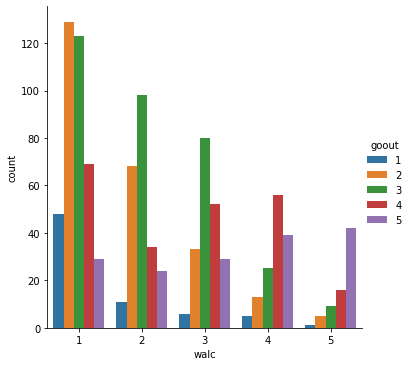

In [37]:
# Do students who go out more drink more alcohol?
sns.catplot(x="walc", hue="goout", kind="count", data=data);

In [38]:
# Is weekly alcohol consumption more than daily?
data[data['dalc'] > data['walc']]

,id,subject,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
71,156109,Por,MS,M,18,R,GT3,T,4,2,other,other,home,father,2,1,1,no,no,yes,no,yes,yes,no,no,5,4,3,4,3,3,0,7,7,0
95,173638,Por,GP,M,21,R,LE3,T,1,1,at_home,other,course,other,2,2,2,no,yes,no,yes,yes,no,yes,yes,5,3,3,5,2,4,21,9,10,10
248,304732,Por,GP,M,16,U,GT3,T,4,4,teacher,teacher,course,mother,1,1,0,no,yes,no,no,yes,no,yes,yes,3,3,2,2,1,5,16,9,9,8
278,337797,Por,MS,F,18,R,GT3,T,4,4,other,teacher,other,father,3,2,0,no,yes,no,no,no,yes,yes,yes,3,2,2,4,2,5,0,7,5,0
309,360184,Por,MS,F,16,R,GT3,T,1,1,at_home,other,other,mother,2,1,0,no,no,no,yes,yes,yes,yes,yes,4,2,2,4,3,2,0,13,12,14
365,411391,Por,MS,M,16,R,LE3,T,4,1,other,at_home,other,father,1,1,0,no,no,no,no,yes,yes,yes,no,4,1,2,2,1,2,0,10,11,11
412,451337,Math,MS,F,18,R,GT3,T,4,4,other,teacher,other,father,3,2,0,no,yes,yes,no,no,yes,yes,yes,3,2,2,4,2,5,10,14,12,11
471,500505,Por,MS,F,17,U,GT3,T,4,2,teacher,other,course,father,2,4,0,no,no,no,no,yes,yes,yes,yes,4,2,3,3,1,5,0,18,18,18
486,512590,Por,GP,F,19,U,GT3,T,1,1,other,other,course,other,3,3,0,no,no,no,yes,yes,no,no,yes,1,5,5,4,3,5,12,10,10,11
547,572426,Por,MS,F,16,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,no,yes,5,4,3,2,1,2,0,13,14,15


In [39]:
# Correlations between G1, G2, and G3
corr = data[['g1','g2','g3']].corr()
corr

,g1,g2,g3
g1,1.000000,0.858739,0.809142
g2,0.858739,1.000000,0.910743
g3,0.809142,0.910743,1.000000


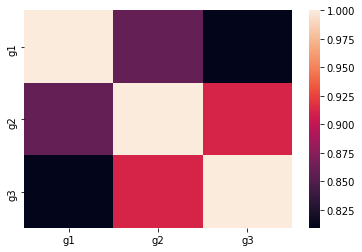

In [40]:
sns.heatmap(corr);

## Feature Engineering

In [45]:
X = pd.DataFrame()

# Continous variables
X['age'] = data.age
X['absences'] = data.absences
X['failures'] = data.failures
X['grade_1'] = data.g1

# Continous and ordinal variables
X['travel_time'] = data.traveltime
X['study_time'] = data.studytime
X['fam_rel'] = data.famrel
X['free_time'] = data.freetime
X['go_out'] = data.goout
X['dalc'] = data.dalc
X['walc'] = data.walc
X['health'] = data.health

# Binary variables (yes / no)
X['activities'] = data.activities.apply(lambda x: 1 if x == 'yes' else 0 )
X['nursery'] = data.nursery.apply(lambda x: 1 if x == 'yes' else 0 )
X['internet'] = data.internet.apply(lambda x: 1 if x == 'yes' else 0 )
X['romantic'] = data.romantic.apply(lambda x: 1 if x == 'yes' else 0 )

# Binary variables (category)
X['subject_por'] = data.subject.apply(lambda x: 1 if x == 'Por' else 0 )
X['school_gp'] = data.school.apply(lambda x: 1 if x == 'GP' else 0 )
X['address_urban'] = data.address.apply(lambda x: 1 if x == 'U' else 0 )
X['famsize_gt3'] = data.famsize.apply(lambda x: 1 if x == 'GT3' else 0 )
X['p_status_together'] = data.pstatus.apply(lambda x: 1 if x == 'T' else 0 )
X['sex_female'] = data.sex.apply(lambda x: 1 if x == 'F' else 0 )

# One-hot encoded variables:
mjob_one_hot = pd.get_dummies(data.mjob, drop_first=True)
X = pd.merge(X,mjob_one_hot.add_suffix('_mjob'), how='left', left_index=True, right_index=True)
fjob_one_hot = pd.get_dummies(data.fjob, drop_first=True)
X = pd.merge(X,fjob_one_hot.add_suffix('_fjob'), how='left', left_index=True, right_index=True)
reason_one_hot = pd.get_dummies(data.reason, drop_first=True)
X = pd.merge(X,reason_one_hot.add_suffix('_reason'), how='left', left_index=True, right_index=True)
guardian_one_hot = pd.get_dummies(data.guardian, drop_first=True)
X = pd.merge(X,guardian_one_hot.add_suffix('_guardian'), how='left',left_index=True, right_index=True)

In [46]:
print(X.shape)
X.head()

(1044, 35)


,age,absences,failures,grade,travel_time,study_time,fam_rel,free_time,go_out,dalc,walc,health,activities,nursery,internet,romantic,subject_por,school_gp,address_urban,famsize_gt3,p_status_together,sex_female,health_mjob,other_mjob,services_mjob,teacher_mjob,health_fjob,other_fjob,services_fjob,teacher_fjob,home_reason,other_reason,reputation_reason,mother_guardian,other_guardian
0,16,12,0,15,1,1,3,2,1,1,4,5,0,1,1,0,1,1,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0
1,17,2,0,17,1,2,5,3,4,1,3,3,1,0,1,0,1,1,1,1,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0
2,16,0,2,9,2,1,4,4,5,3,5,5,0,0,1,0,1,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0
3,17,4,0,14,2,2,4,4,3,1,1,3,1,1,1,0,1,0,1,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0
4,16,2,0,12,2,1,4,3,2,1,4,5,0,1,0,0,1,1,1,1,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0


In [43]:
# Assign target variable
FAILURE_THRESHOLD = 10
y = data.g3.apply(lambda x: 1 if x < FAILURE_THRESHOLD else 0 )
print(y.shape)
print(y.value_counts())

(1044,)
0    814
1    230
Name: g3, dtype: int64


In [47]:
# Save the csvs
X.to_csv('../matrices/portuguese_students/portuguese_students_X.csv')
y.to_csv('../matrices/portuguese_students/portuguese_students_y.csv')

# Correlations

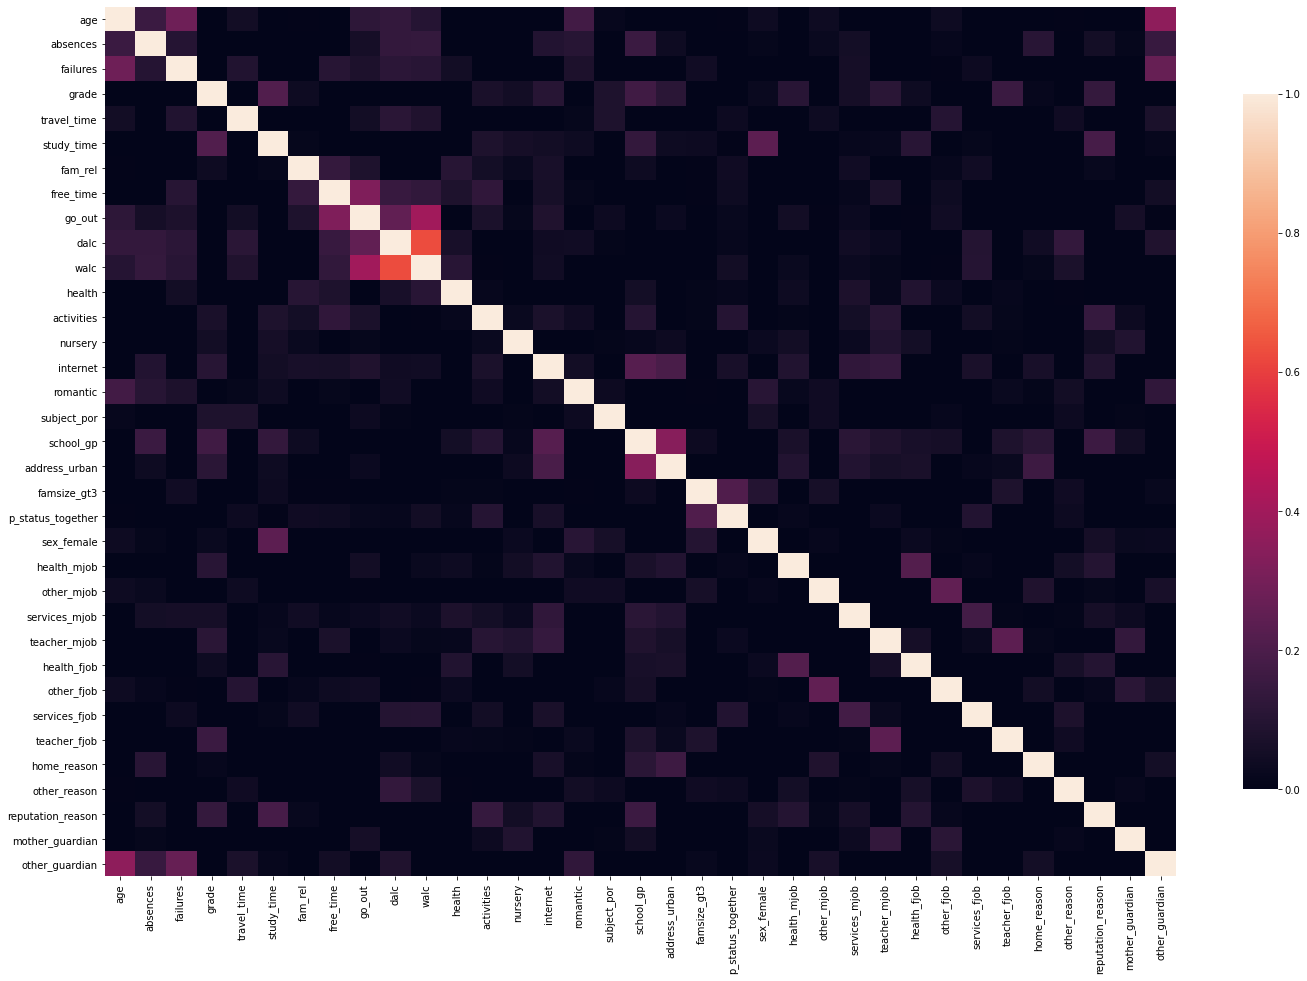

In [48]:
# Feature correlation
corr = X.corr()
# Heatmap
fig, ax = plt.subplots(figsize=(24, 16))
sns.heatmap(corr, vmin=0, vmax=1, cbar_kws={'shrink': .8});